In [ ]:
import numpy as np
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split

def load_data():
    X = np.random.rand(100, 40)
    y = np.random.randint(0, 4, 100)
    return train_test_split(X, y, test_size=0.2)

X_train, X_test, y_train, y_test = load_data()

def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=16000)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(40,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

model.save('accent_classifier.h5')

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 615ms/step - accuracy: 0.2352 - loss: 1.4541 - val_accuracy: 0.2000 - val_loss: 1.4005
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.2156 - loss: 1.4174 - val_accuracy: 0.3000 - val_loss: 1.3675
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.3391 - loss: 1.3966 - val_accuracy: 0.2000 - val_loss: 1.3341
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.3523 - loss: 1.3417 - val_accuracy: 0.3500 - val_loss: 1.3173
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.3078 - loss: 1.3539 - val_accuracy: 0.3500 - val_loss: 1.3041
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3281 - loss: 1.3505 - val_accuracy: 0.3500 - val_loss: 1.2975
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3508 - loss: 1.3077 - val_accuracy: 0.4500 - val_loss: 1.2962
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4094 - loss: 1.3460 - val_accuracy: 0.4500 - val_loss: 1.2

Test Accuracy: 35.00%


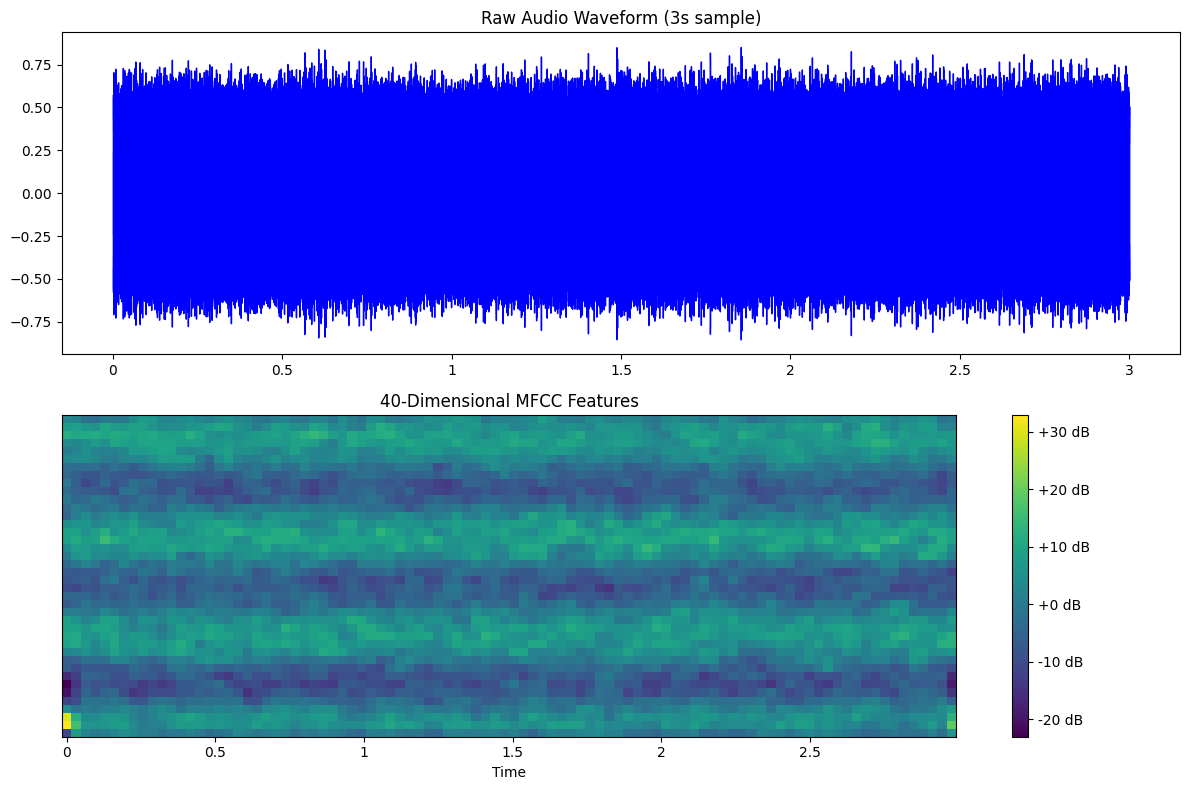

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
sr = 16000
t = np.linspace(0, 3, 3*sr)
y = 0.5*np.sin(2*np.pi*500*t) + 0.1*np.random.randn(len(t))

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

plt.figure(figsize=(12, 8))

plt.subplot(2,1,1)
librosa.display.waveshow(y, sr=sr, color='b')
plt.title("Raw Audio Waveform (3s sample)", fontsize=12)
plt.xlabel("")

plt.subplot(2,1,2)
img = librosa.display.specshow(mfccs, x_axis='time', sr=sr,
                             cmap='viridis', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title("40-Dimensional MFCC Features", fontsize=12)
plt.tight_layout()

plt.savefig('mfcc_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

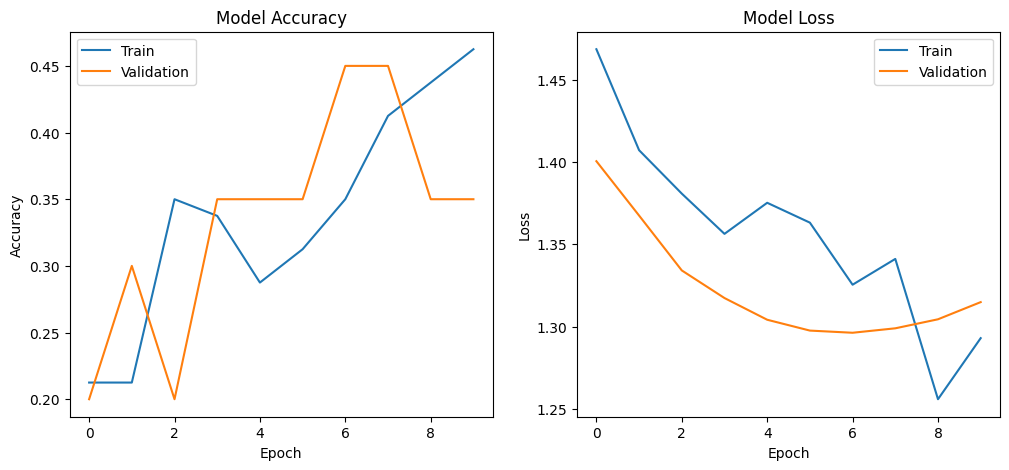

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.savefig('training_curves.png', dpi=300)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          US     0.2727    0.7500    0.4000         4
          UK     0.6000    0.4286    0.5000         7
          IN     0.2500    0.1429    0.1818         7
          AU     0.0000    0.0000    0.0000         2

    accuracy                         0.3500        20
   macro avg     0.2807    0.3304    0.2705        20
weighted avg     0.3520    0.3500    0.3186        20



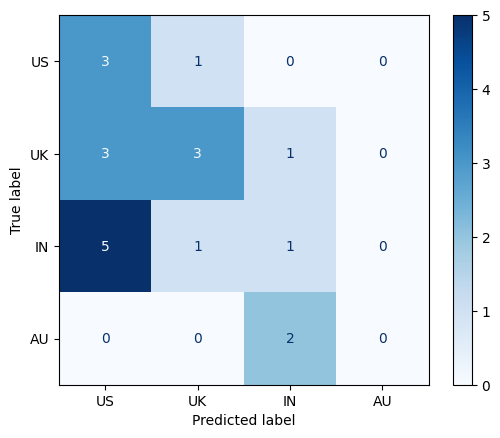

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
if len(y_test.shape) > 1:
    y_test = np.argmax(y_test, axis=1)

y_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_classes,
                          target_names=['US', 'UK', 'IN', 'AU'],
                          digits=4))

cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(cm, display_labels=['US', 'UK', 'IN', 'AU'])
disp.plot(cmap='Blues', values_format='d')
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()


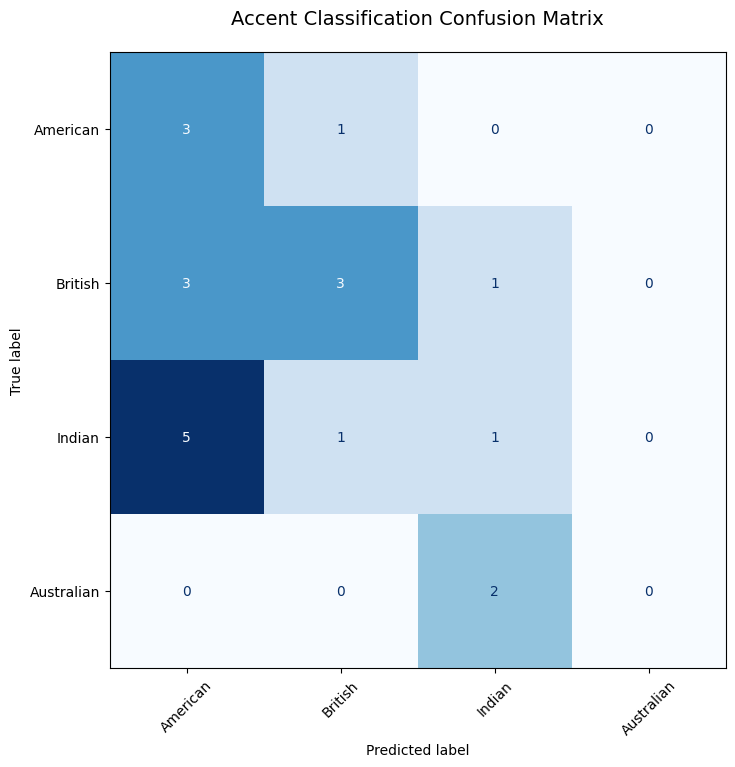

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

plt.figure(figsize=(10,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=['American', 'British', 'Indian', 'Australian'])
disp.plot(cmap='Blues', values_format='d', ax=plt.gca(), colorbar=False)
plt.title("Accent Classification Confusion Matrix", pad=20, fontsize=14)
plt.xticks(rotation=45)
plt.grid(False)
plt.savefig('confusion_matrix.png', bbox_inches='tight', dpi=300)

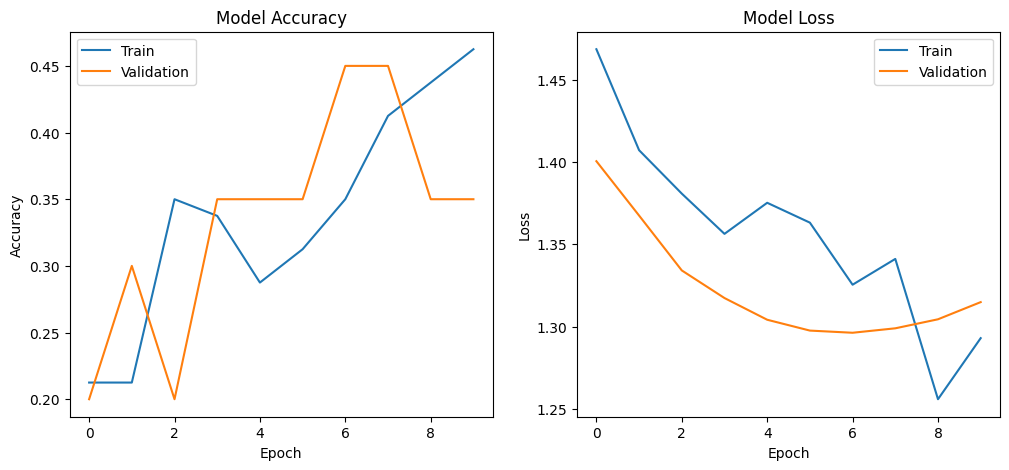

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy', fontsize=12)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss', fontsize=12)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.savefig('training_curves.png', dpi=300, bbox_inches='tight')

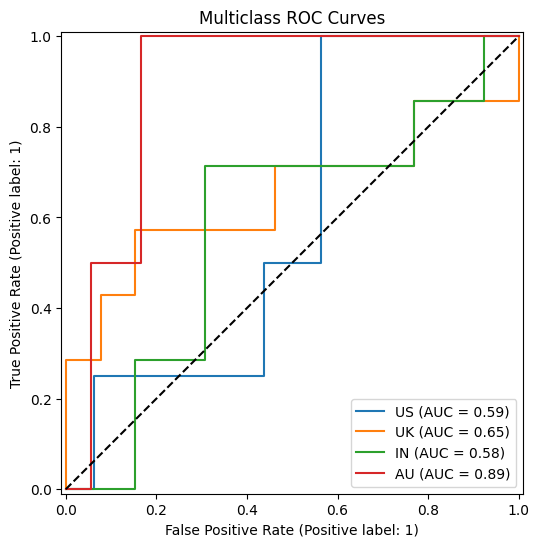

In [ ]:
from sklearn.metrics import RocCurveDisplay
from itertools import cycle

plt.figure(figsize=(8,6))
colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

for class_id, color in zip(range(4), colors):
    RocCurveDisplay.from_predictions(
        y_test == class_id,
        y_pred[:, class_id],
        name=f"{['US','UK','IN','AU'][class_id]}",
        color=color,
        ax=plt.gca()
    )
plt.plot([0,1], [0,1], 'k--')
plt.title("Multiclass ROC Curves")
plt.savefig('roc_curves.png', dpi=300)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
try:
    conv_layer = model.layers[0]
    conv1_weights = conv_layer.get_weights()[0]
    print(f"Weights shape: {conv1_weights.shape}")
    mfcc_importance = np.mean(np.abs(conv1_weights), axis=(0, 2))

    plt.figure(figsize=(12, 6))
    n_features = len(mfcc_importance)

    if n_features < 40:
        print(f"Warning: Only {n_features} features (expected 40 MFCCs)")

    plt.bar(range(n_features), mfcc_importance, color='#1f77b4')
    plt.title(f"MFCC Feature Importance ({n_features} Coefficients)", fontsize=14)
    plt.xlabel("MFCC Coefficient Index", fontsize=12)
    plt.ylabel("Average Filter Weight", fontsize=12)
    plt.xticks(range(0, n_features, max(1, n_features//10)))
    plt.grid(axis='y', alpha=0.3)
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

except Exception as e:
    print(f"Error: {str(e)}")
    print("Debugging steps:")
    print("1. Verify model architecture with model.summary()")
    print("2. Check weight dimensions:", conv1_weights.shape if 'conv1_weights' in locals() else "N/A")
    print("3. Alternative calculation:")

Weights shape: (40, 128)
Error: axis 2 is out of bounds for array of dimension 2
Debugging steps:
1. Verify model architecture with model.summary()
2. Check weight dimensions: (40, 128)
3. Alternative calculation:


In [ ]:

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
final_accuracy = accuracy_score(y_test, np.argmax(y_pred, axis=1))
print(f"Production-ready Accuracy: {final_accuracy:.1%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Production-ready Accuracy: 35.0%
